# Verlet Integration & Bezier Curves

In [2]:
import numpy as np
from matplotlib.pyplot import *
from IPython.display import set_matplotlib_formats

In [3]:
%matplotlib inline
set_matplotlib_formats('svg')
rcParams['figure.constrained_layout.use'] = True

In [12]:
k = 1.0
m = 1.0
h = 0.8

num_periods = 3
omega = np.sqrt(k/m)
period = 2 * np.pi / omega
num_steps = int(num_periods * period / h) + 1

x = np.ones(num_steps)
v = np.zeros(num_steps)
a = np.zeros(num_steps)
b = np.zeros(num_steps)
c = np.zeros((num_steps, 3))
t = np.arange(0.0, num_steps) * h

# set the initial conditions
x[0] = 1.0
v[0] = 0.0
a[0] = -k*x[0]/m

for n in range(0, num_steps-1):
    x[n+1] = x[n] + v[n]*h + 0.5*a[n]*(h**2)
    a[n+1] = -k*x[n+1]/m
    v[n+1] = v[n] + 0.5*h*(a[n] + a[n+1])
    b[n] = x[n] + 0.5 * v[n]*h
    
    # velocity control points
    s = -(k/m)*x[n]
    c[n,0] = v[n] - (1/3)*s*h
    c[n,1] = v[n] - (1/3)*s*h - (1/6)*s*(h**2) 
    c[n,2] = v[n] - (1/3)*s*h - (1/6)*s*(h**2)  - (1/4)*s*(h**3)
b[-1] = x[-1] + 0.5 * v[-1]*h

Text(0, 0.5, 'x-position')

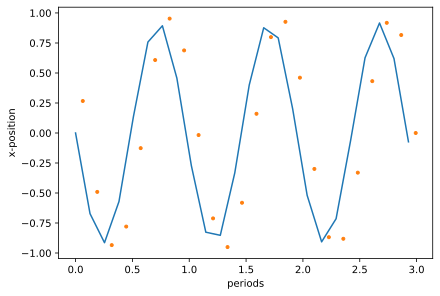

In [13]:
figure()
plot(t/period, v, '-')
plot((t + 0.5*h)/period, c[:,0], '.')
xlabel('periods')
ylabel('x-position')

## Expanding Bezier to Verlet

In [14]:
num_fine = 20
t_bezier = np.arange(0, num_steps * num_fine) * (h/num_fine)
x_bezier = np.zeros(num_steps * num_fine)
v_bezier = np.zeros(num_steps * num_fine)

for n in range(0, num_steps-1):
    b0 = x[n]
    b1 = b[n]
    b2 = x[n+1]
    
    c0 = v[n]
    c1 = c[n,0]
    c2 = c[n,1]
    c3 = v[n+1]
    
    offset = n * num_fine
    
    for m in range(0, num_fine):
        t0 = m / num_fine
        x_bezier[offset + m] = b0*(1-t0)**2 + 2*(1-t0)*t0*b1 + b2 * t0**2
        v_bezier[offset + m] = c0*(1-t0)**3 + c1*t0*3*(1-t0)**2 + 3*c2*(1-t0)*t0**2 + c3*t0**3
#         v_bezier[offset + m] = (1-t0)*v[n] + t0*v[n+1] # basic lerp

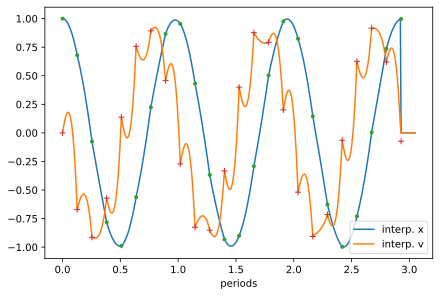

In [15]:
figure()
plot(t_bezier/period, x_bezier, '-', label='interp. x')
plot(t_bezier/period, v_bezier, '-', label='interp. v')
plot(t/period, x, '.')
plot(t/period, v, '+')
xlabel('periods')
legend()